This notebook is for demonstration of a written decision tree implementation with the iris dataset to predict classes.

In [1]:
#import needed classes
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

The data is orginized so we can take a look at the training data for the data set that we created.

In [3]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

The data set shows that we have four different columns to help classify the data into the outcome classifiers y. So, we need to split the data into training and test data before we start creating a tree.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
  X,y , random_state=104,test_size=0.20, shuffle=True)

Then we can look at the entropy and gini index of the data

In [5]:
node = X_train[:,1]
n = len(node)
value,counts = np.unique(node, return_counts=True)
probs = counts / n
ent = 0
ent -= np.sum(probs * np.log2(probs))
print(ent)
gini = 0
gini = 1 - np.sum(probs*probs)
print(gini)
entropy = scipy.stats.entropy(node, base=2)
entropy

4.026733920282254
0.9241071428571429


np.float64(6.792708445804972)

Now we can move into making the tree which requires a few functions working together. First thing we do in creating the tree is check if the node is pure and is splittable. If it is, then we identify the majority class using entropy in the scoref function and separate the data into two nodes by that class. The function will recursively run down all branches of the tree until all nodes are pure.

In [12]:
#create node class for each level of the tree to split


#checks to see if the node is splittable - creates a set from all the values of y and checks if
# is greater than 1
def isSplittable(y):
    return len(y)>1

#takes x y and the feature needs to also thake a threshold value to split.
#project the children and split it then compute the entropy for each and the total weighted entropy
def scoref(X,y,f):
    values = np.unique(X[:,f])
    bestent = 2
    for c in values:
        entr=0
        entl=0
        r = y[X[:,f]>=c] #right child
        valuer = np.unique(r)
        for value in valuer:
            ex = r[r==value]
            probsr = len(ex) / len(r)
            entr += -probsr * np.log2(probsr)
        
        l = y[X[:,f]<c] # left child
        valuel = np.unique(l)
        for value in valuel:
            ex = l[l==value]
            probsl = len(ex) / len(l)
            entl += -probsl * np.log2(probsl)
     
        probsr = len(r) / len(y)
        probsl = len(l) / len(y)
        ent = entr*probsr + entl*probsl
        if ent < bestent:
            bestent = ent
            bestc = c
    
    return bestent, bestc

def createTree(X,y):
    if  np.unique(y).size > 1 and isSplittable(y): #statements to make sure size is accepable and node is splittable
        #print('spliting')
        best=19000000
        bestindex=-1
        for i in range(X.shape[1]): #for each index in X
            if len(set([h for h in X[:,i]]))>1: # if the length of the columns is greater than 1
                score, c = scoref(X,y,i) #pass in the arrays and a column value to scores to generate a value
                #print(i, score)
                if best>=score: 
                    best=score
                    bestindex=i
                    bestc = c
        if bestindex==-1:
            #print('node pure:', bestindex)
            return ('is this hit?',bestc) #leaf node with the class
        else:
            #print('index:', bestindex, ' value: ', bestc)
            #print('True:', X[X[:,bestindex]>=bestc], y[X[:,bestindex]>=bestc])
            cl=createTree(X[X[:,bestindex]>=bestc], y[X[:,bestindex]>=bestc]) #split right node and create new tree.

            #print('False:', X[X[:,bestindex]<bestc], y[X[:,bestindex]<bestc])
            cr=createTree(X[X[:,bestindex]<bestc],y[X[:,bestindex]<bestc]) #split left node and create new tree.
            return (bestindex, bestc, cr, cl)
    else:
        return ('leaf', y[0]) #create leaf node.
    
def inference(T,X):
    return np.array([pred(T,x) for x in X])


def pred(T,x):
    (index, value, *tree) = T
    if index != 'leaf':
        if x[index] < value:
            return pred(tree[0],x)
        else:
            return pred(tree[1],x)
    else:
        return value

In [13]:
T=createTree(X_train,y_train)
T

(3,
 np.float64(1.0),
 ('leaf', np.int64(0)),
 (3,
  np.float64(1.8),
  (2,
   np.float64(5.0),
   (3, np.float64(1.7), ('leaf', np.int64(1)), ('leaf', np.int64(2))),
   (3,
    np.float64(1.6),
    ('leaf', np.int64(2)),
    (2, np.float64(5.8), ('leaf', np.int64(1)), ('leaf', np.int64(2))))),
  (2,
   np.float64(4.9),
   (1, np.float64(3.2), ('leaf', np.int64(2)), ('leaf', np.int64(1))),
   ('leaf', np.int64(2)))))

With the tree made we can then look at its ability to predict values

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



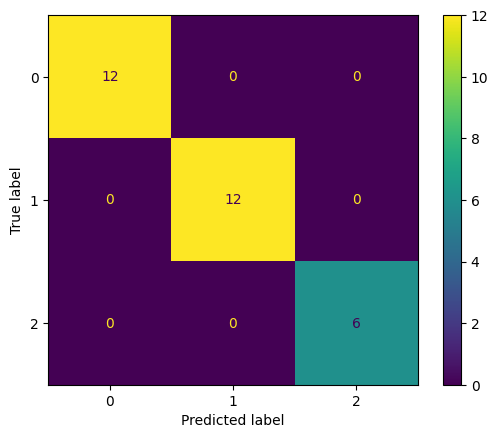

In [14]:
y_pred_t=inference(T,X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print(classification_report(y_test, y_pred_t))
cm = confusion_matrix(y_test, y_pred_t)
cm_display = ConfusionMatrixDisplay(cm).plot()

Wow 95% accuracy is high! With that information, lets see how the sklearn tree perfroms in its implementation

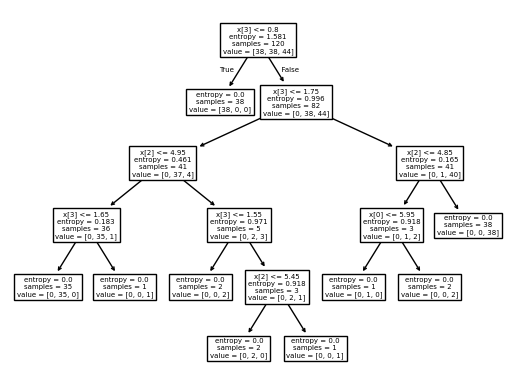

In [15]:
#Tree in sklearn for reference.
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf)
y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



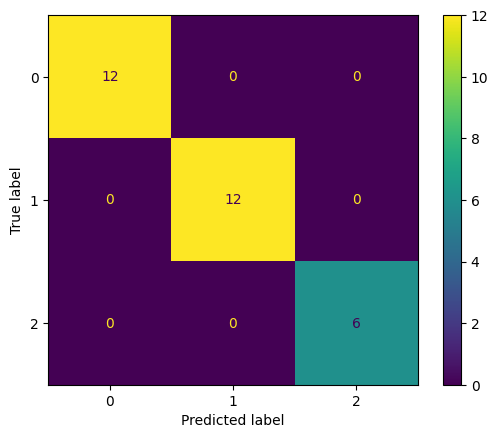

In [16]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

To end, it's pretty cool to see how the tree I created can run as accurately as the sklearn model!